In [1129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)

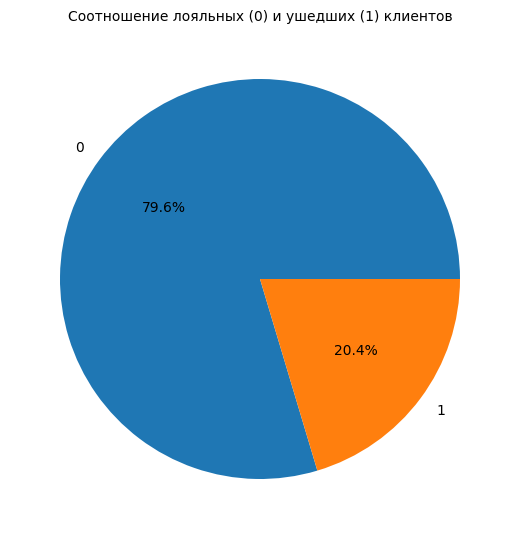

In [1130]:
# Задание 9.1

ratio_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение лояльных (0) и ушедших (1) клиентов', fontsize=10),
axes.pie(
    ratio_clients,
    labels=ratio_clients.index,
    autopct='%.1f%%'
);

Вывод: процент лояльных клиентов составляет 79,6%, процент ушедших клиентов составляет 20,4%

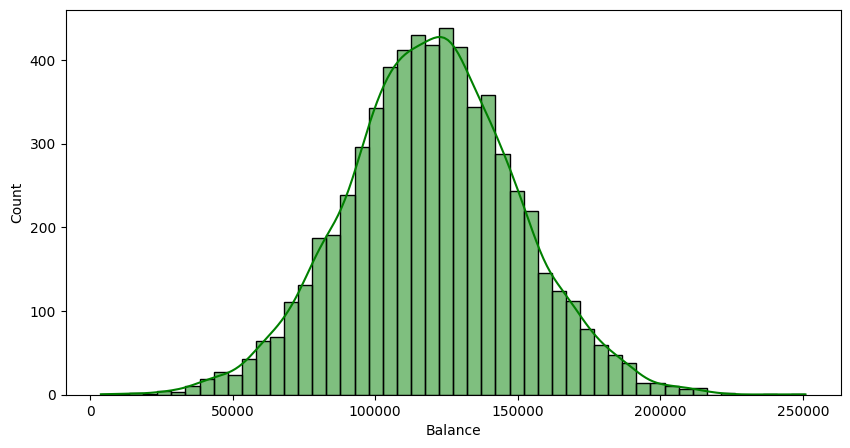

In [1131]:
# Задание 9.2

fig = plt.figure(figsize=(10, 5))
client_balances = churn_data[churn_data['Balance'] > 2500]
sns.histplot(
    data=client_balances,
    x='Balance',
    bins=50,
    kde=True,
    color='green'
);

Выводы по графику:
Диапазон баланса составляет от 2500 до 250000 долларов. Из графика видно, что число клиентов резко возрастает по мере приближения их баланса до максимального значения в 120000 долларов, и так же резко спадает после прохождения максимума при дальнейшем увеличении баланса. Можно сделать вывод, что наибольшее число клиентов имеет баланс около 120000 долларов. 

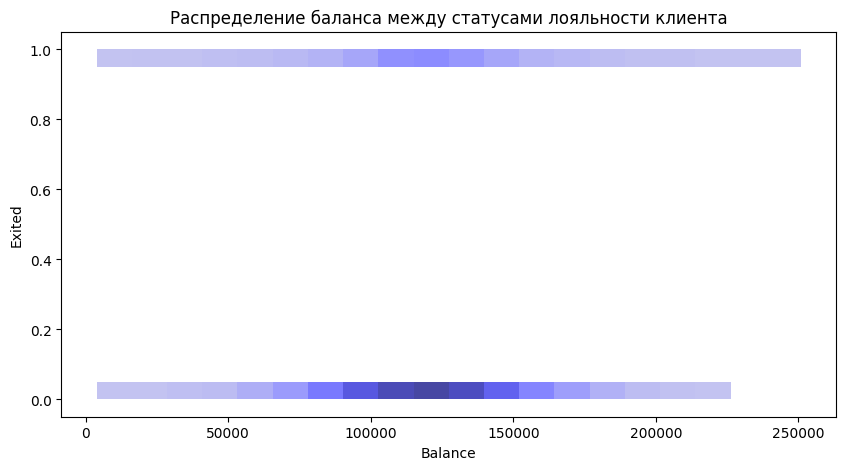

In [1132]:
# Задание 9.3

fig = plt.figure(figsize=(10, 5))
client_balances = churn_data[churn_data['Balance'] > 2500]

client = sns.histplot(
    data=client_balances,
    x='Balance',
    y='Exited',
    bins=20,
    color='blue'
)
client.set_title('Распределение баланса между статусами лояльности клиента', fontsize=12);


Вывод.\
В разрезе признака оттока можно видеть, что суммы у лояльных клиентов на счету гораздо больше, чем у ушедших. Основная масса лояльных клиентов имеет на счете сумму около 120000$, тогда как у ушедших клиентов баланс равномерно размазан в широком диапазоне. Более большие суммы у лояльных клиентов может говорить о том, что эти клиенты активно пользуются услугами банка - берут кредиты, хранят свои сбережения и выполняют расчеты в этом банке. Еще это может быть связано с долгосрочными вкладами или активами, которые клиенты держат в этом банке. Им будет невыгодно уходить в другой банк, так как в этом банке у них хороший рейтинг и им дают кредит под меньший процент. На долю ушедших клиентов приходится значительно меньше капиталла. Этим клиентам нет необходимости оставаться в этом банке, так как их суммы незначительны по сравнению с лояльными клиентами.

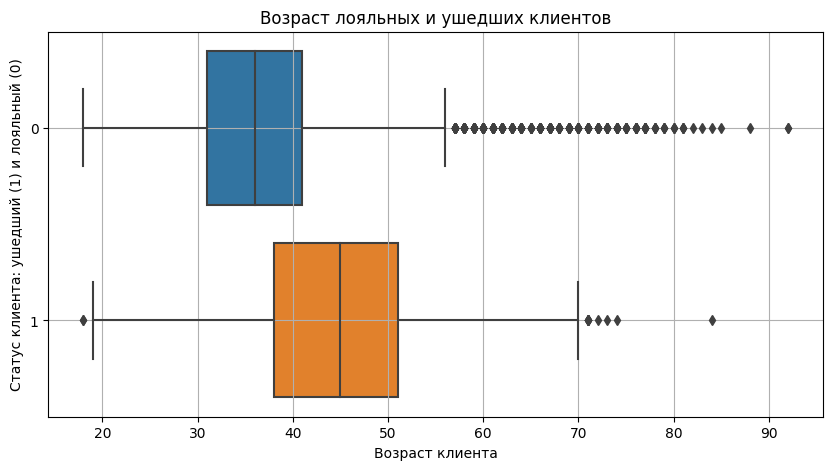

In [1133]:
# Задание 9.4

fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
)
boxplot.set_title('Возраст лояльных и ушедших клиентов', fontsize=12);
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('Статус клиента: ушедший (1) и лояльный (0)');
boxplot.grid()

Вывод. Число потенциальных выбросов больше у лояльных клиентов. Выглядит нелогично, когда верхняя граница возраста лояльных клиентов значительно ниже ушедших, так как лояльность означает, что клиент продолжает пользоваться услугами банка. Лояльные клиенты в возрасте 56 и более лет нуждаются в дополнительном исследовании из-за большого числа выбросов. Возможно удасться выявить причину таких частых выбросов и повысить прогноз оттока.

Text(0, 0.5, 'Прелпологаемая заработная плата')

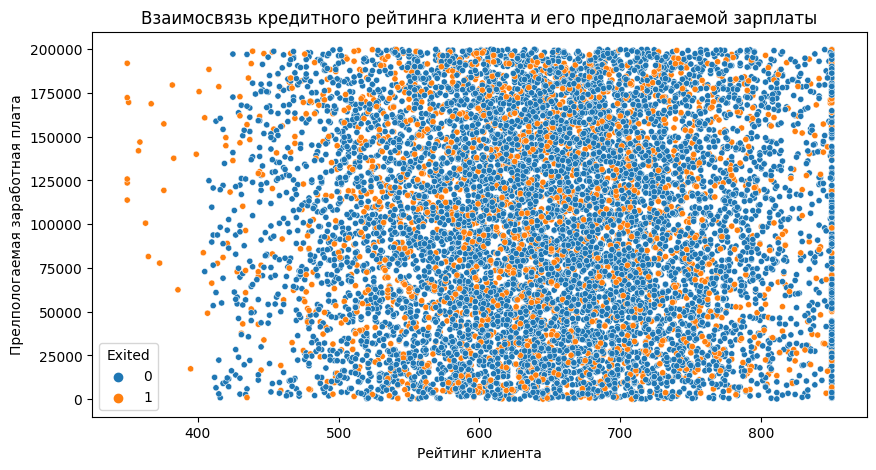

In [1134]:
# Задание 9.5

fig = plt.figure(figsize=(10, 5))
relationship = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=20,
)
relationship.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=12)
relationship.set_xlabel('Рейтинг клиента')
relationship.set_ylabel('Прелпологаемая заработная плата')

Вывод: рейтинг и предпологаемая зарплата не взаимосвязаны между собой и не зависят от типа клиента.

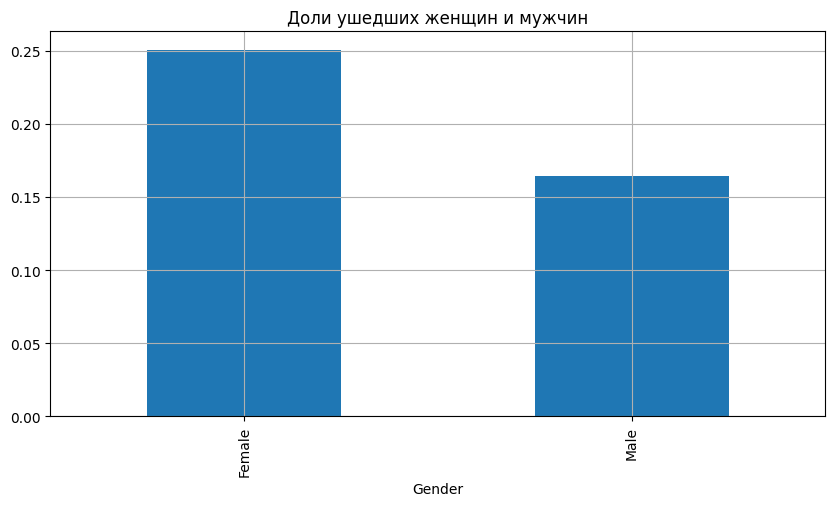

In [1135]:
# Задание 9.6

grouped_genders = churn_data.groupby(['Gender'])['Exited'].mean()
grouped_genders.plot(
    kind='bar',
    grid=True,
    figsize=(10, 5),
    title='Доли ушедших женщин и мужчин'
);

Из графика видно, что женщины уходят чаще чем мужчины.

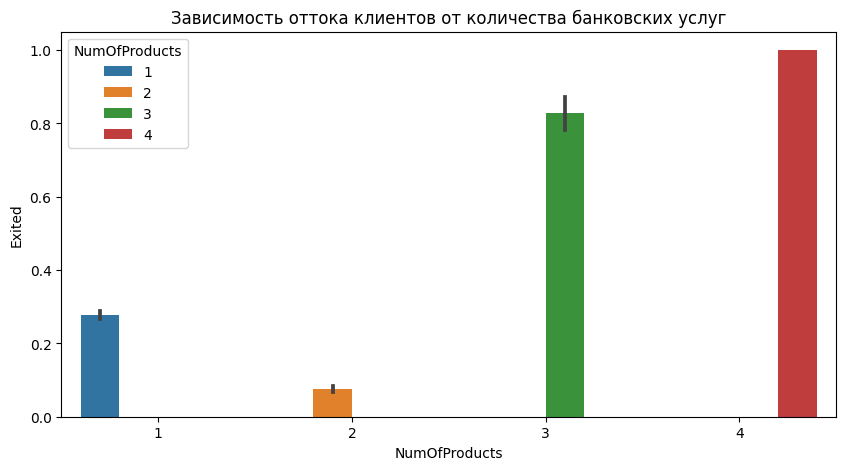

In [1136]:
#Задание 9.7

fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
    hue='NumOfProducts',
)
barplot.set_title('Зависимость оттока клиентов от количества банковских услуг');

В задании написано, что нужно построить многоуровневую столбчатую диаграмму. Получилось только так. Не могу описать данную диаграмму. Могу предположить, что ушедшие клиенты имели больше услуг чем лояльные, но это нелогично.

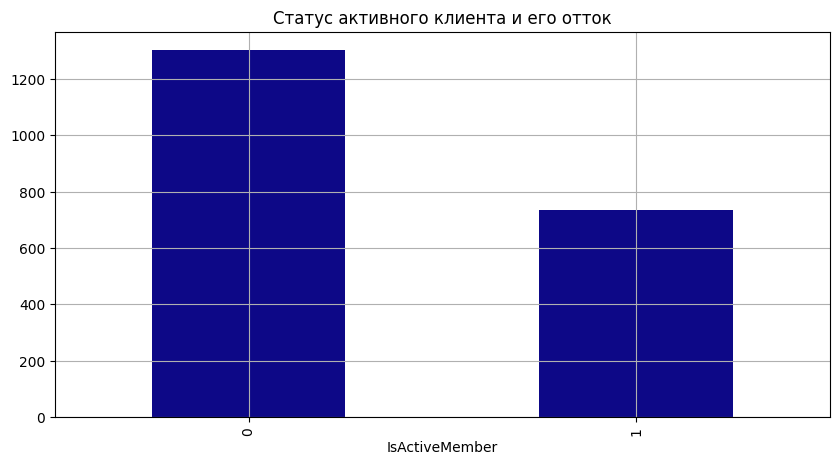

In [1137]:

#Задание 9.8

customer_activity = churn_data.groupby(['IsActiveMember'])['Exited'].sum()
customer_activity.plot(
    kind='bar',
    grid=True,
    title='Статус активного клиента и его отток',
    figsize=(10, 5),
    colormap='plasma'
);

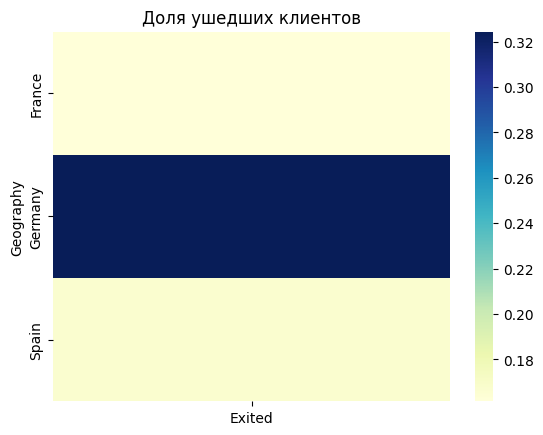

In [1138]:
#Задание 9.9

pivot = churn_data.pivot_table(
    values='Exited',
    #columns='IsActiveMember',
    index='Geography',
    aggfunc='mean'
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu');
heatmap.set_title('Доля ушедших клиентов');

Доля ушедших клиентов больше в Германии.

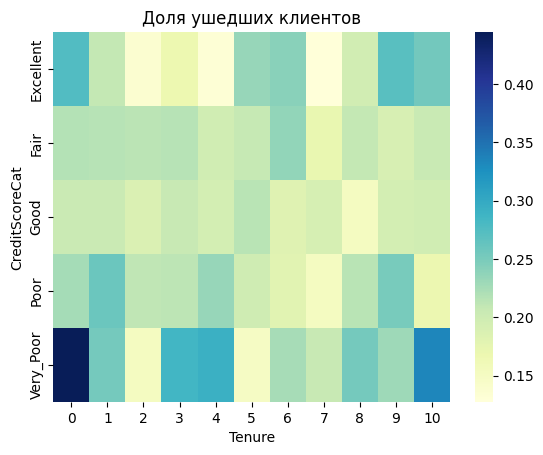

In [1139]:

#Задание 9.10

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

heat_map = churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()
heatmap = sns.heatmap(data=heat_map, cmap='YlGnBu')
heatmap.set_title('Доля ушедших клиентов');

По тепловой карте можно сделать вывод, что чаще всего уходят клиенты, которые пользуются услугами банка не более одного года и имеют самый низкий рейтинг. Также можно заметить, что в целом чаще уходят клиенты с малым рейтингом, и особенно, почему-то, которые пользовались услугами 10 лет.